# RAMP: Predicting 
*Lambi Michalopoulos, Hugo pointier, Vivek Ashokan, Nathan Maligeay, Romain Poupon*

## Table of Contents
* [Introduction](#introduction)
* [The dataset](#dataset)
* [Data exploration](#exploration)
* [Requirements](#requirements)
* [Base model](#base_model)
* [Submitting on RAMP](#submitting)

## Introduction <a class="anchor" id="introduction"></a>


## The dataset <a class="anchor" id="dataset"></a>

## Requirements <a class="anchor" id="requirements"></a>

In [3]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


## Download Data

In [4]:
# Uncomment the following line to download data:
!python download_data.py

The download file already exists in data/deputes-active.csv


## Prepare Data

In [5]:
!python prepare_data.py

Train dataset created
Test dataset created


## Data Exploration <a class="anchor" id="exploration"></a>

### Training data 

Here we load the whole .csv file but we will select only the geochemical variables in order to train models for this challenge.

In [6]:
df = pd.read_csv('data/deputes-active.csv')
df

,id,legislature,civ,nom,prenom,villeNaissance,naissance,age,groupe,groupeAbrev,...,twitter,facebook,website,nombreMandats,experienceDepute,scoreParticipation,scoreParticipationSpecialite,scoreLoyaute,scoreMajorite,dateMaj
0,PA1008,16,M.,David,Alain,Libourne,1949-06-02,74,Socialistes et apparentés,SOC-A,...,@AlainDavid_AN,AlainDavidAssembleeNationale,alain-david.com,2,7 ans,0.24,0.75,0.978,0.363,2024-03-02
1,PA1206,16,M.,Dupont-Aignan,Nicolas,Paris,1961-03-07,62,Non inscrit,NI,...,@dupontaignan,nicolasdupontaignan,NaN,5,22 ans,0.05,0.00,0.922,0.157,2024-03-02
2,PA1327,16,M.,Forissier,Nicolas,Paris,1961-02-17,63,Les Républicains,LR,...,@N_Forissier,nicolas.forissier,NaN,3,12 ans,0.10,0.00,0.907,0.858,2024-03-02
3,PA1567,16,M.,Guedj,Jérôme,Pantin,1972-01-23,52,Socialistes et apparentés,SOC-A,...,@JeromeGuedj,jerome.guedj,jerome-guedj.fr/,3,3 ans,0.19,0.42,0.992,0.302,2024-03-02
4,PA1592,16,M.,Habib,David,Paris,1961-03-16,62,Non inscrit,NI,...,@DavidDhabib,DavidHabib64,www.david-habib.fr,5,22 ans,0.04,0.01,0.899,0.913,2024-03-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,PA805166,16,Mme,Bergantz,Anne,Chalons-sur-Saône,1968-09-17,55,Démocrate (MoDem et Indépendants),DEM,...,NaN,NaN,NaN,1,1 an,0.45,0.77,0.985,0.971,2024-03-02
573,PA817203,16,Mme,Miller,Laure,Reims,1983-12-25,40,Renaissance,RE,...,NaN,NaN,NaN,1,1 an,0.29,0.33,0.997,0.997,2024-03-02
574,PA817211,16,M.,Pilato,René,Lagny-sur Marne,1962-08-31,61,La France insoumise - Nouvelle Union Populaire...,LFI-NUPES,...,@PilatoRene,René Pilato,renepilato.fr/,1,1 an,0.33,0.35,0.989,0.249,2024-03-02
575,PA822617,16,Mme,Froger,Martine,Blois,1961-06-11,62,"Libertés, Indépendants, Outre-mer et Territoires",LIOT,...,MartineFrogerAN,NaN,NaN,1,1 an,0.11,0.17,0.909,0.598,2024-03-02


In [7]:
column_names = df.columns

print(column_names)

Index(['id', 'legislature', 'civ', 'nom', 'prenom', 'villeNaissance',
       'naissance', 'age', 'groupe', 'groupeAbrev', 'departementNom',
       'departementCode', 'circo', 'datePriseFonction', 'job', 'mail',
       'twitter', 'facebook', 'website', 'nombreMandats', 'experienceDepute',
       'scoreParticipation', 'scoreParticipationSpecialite', 'scoreLoyaute',
       'scoreMajorite', 'dateMaj'],
      dtype='object')


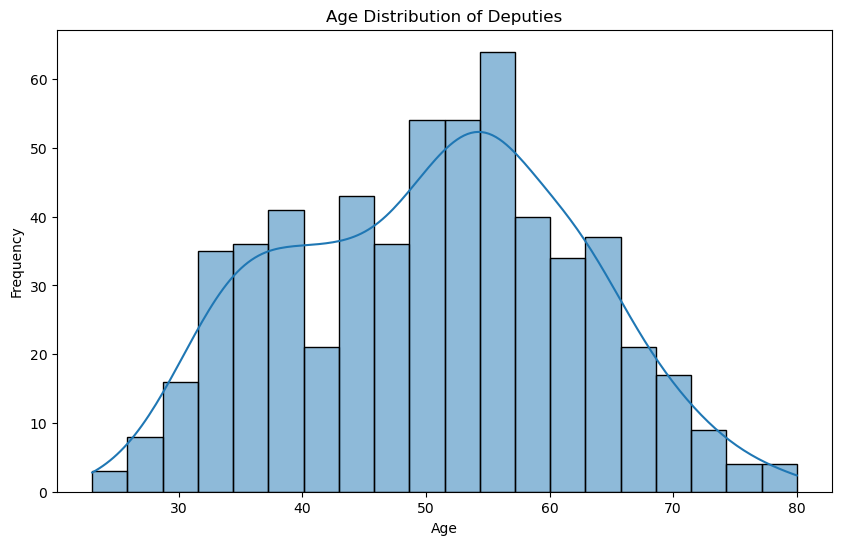

In [10]:
# Histogram of ages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution of Deputies')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

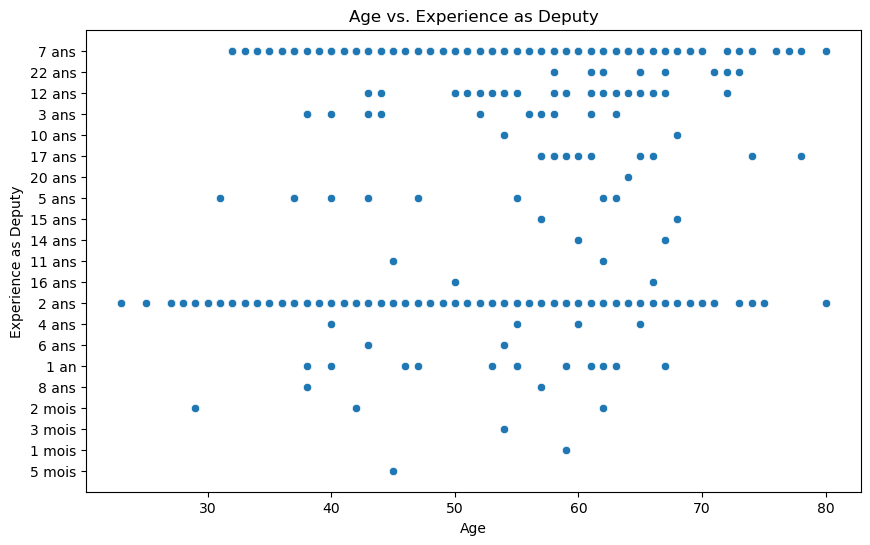

In [11]:
# Scatter plot age vs experience
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='experienceDepute')
plt.title('Age vs. Experience as Deputy')
plt.xlabel('Age')
plt.ylabel('Experience as Deputy')
plt.show()

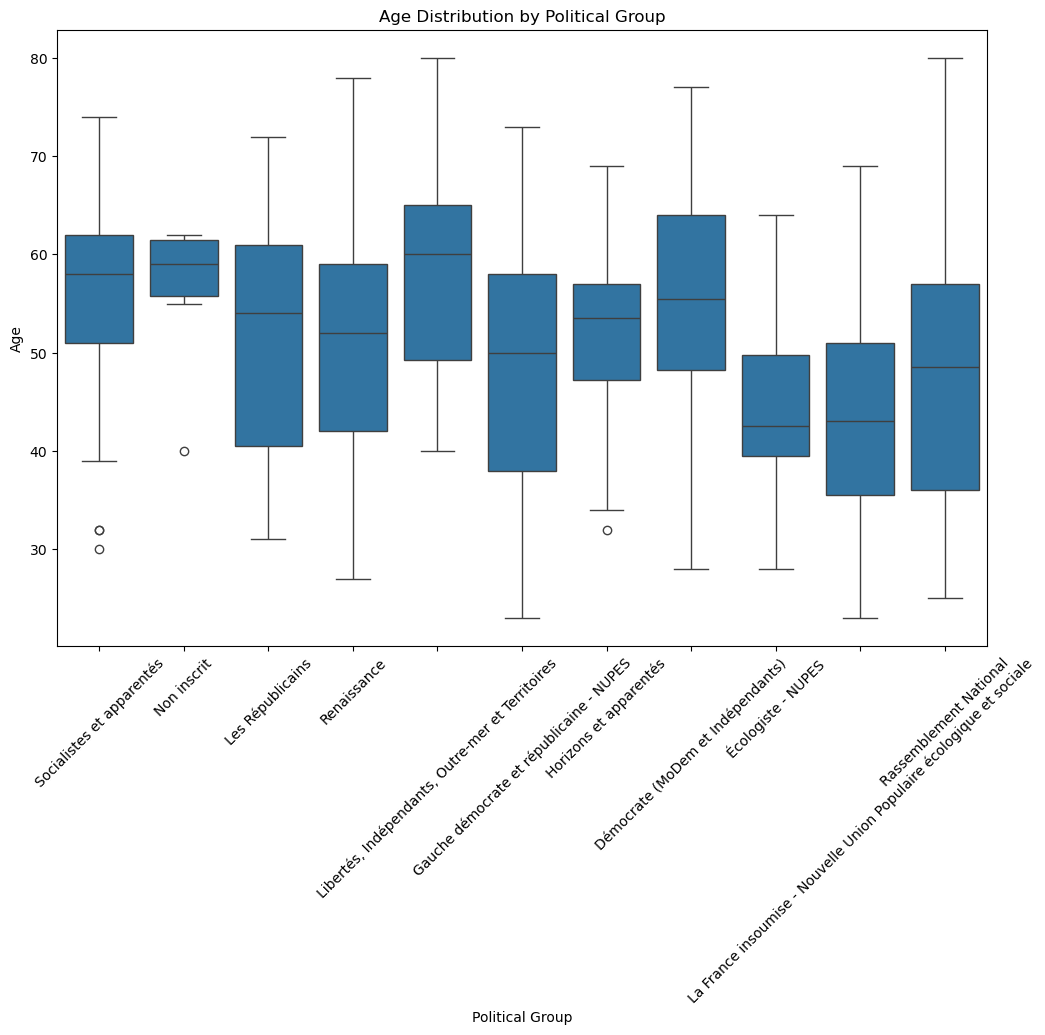

In [16]:
# Box Plot of Age by Political Group
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='groupe', y='age')
plt.title('Age Distribution by Political Group')
plt.xlabel('Political Group')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

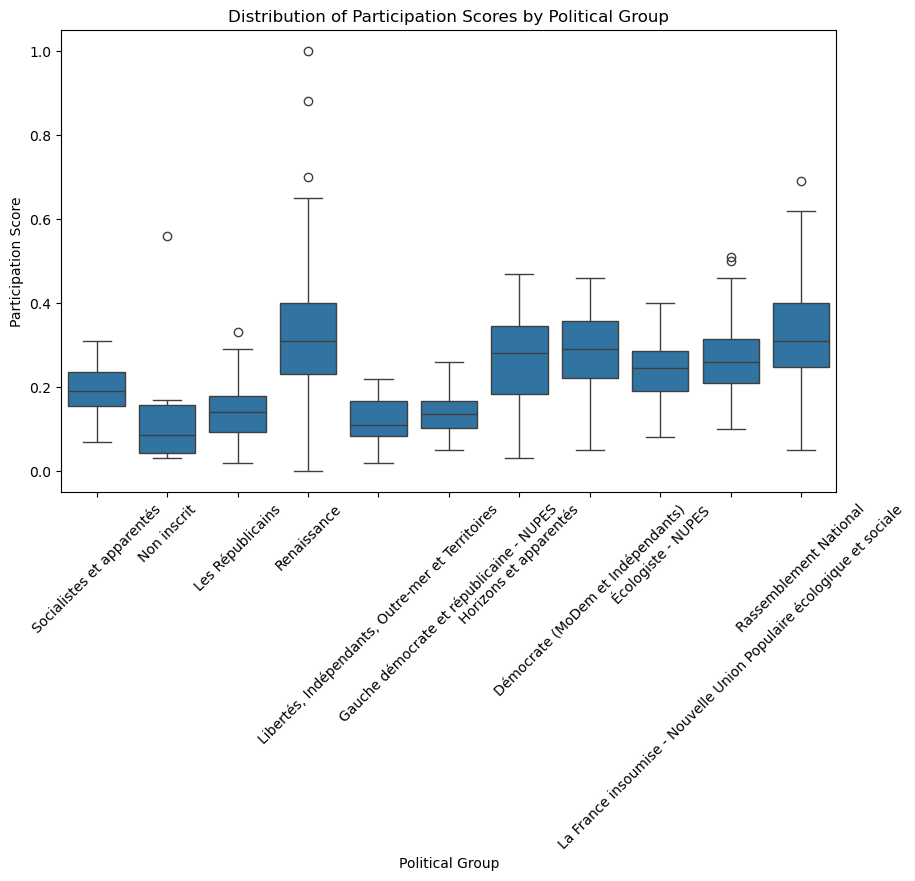

In [12]:
# Box plot score de participation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='groupe', y='scoreParticipation')
plt.title('Distribution of Participation Scores by Political Group')
plt.xlabel('Political Group')
plt.ylabel('Participation Score')
plt.xticks(rotation=45)
plt.show()